In [102]:
## Import required packages
import sqlite3
import os
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.formula.api as smf
from linearmodels.panel import PanelOLS
from linearmodels.panel import PooledOLS
from linearmodels.panel import BetweenOLS
from linearmodels.panel import RandomEffects

In [103]:
cd D:\STUDY\SEM3 - summer\Programming for Data Science

D:\STUDY\SEM3 - summer\Programming for Data Science


In [104]:
np.random.seed(10)
os.getcwd()
path='D:\\STUDY\\SEM3 - summer\\Programming for Data Science'
os.chdir(path)
## Connect to Wooldridgedb
con = sqlite3.connect("wooldridge.db")
c = con.cursor()
c.execute('SELECT * FROM ceosal2')
ceosal = pd.read_sql('SELECT * FROM ceosal2',con)
ceosal.head()



,index,salary,age,college,grad,comten,ceoten,sales,profits,mktval,lsalary,lsales,lmktval,comtensq,ceotensq,profmarg
0,0,1161,49,1,1,9,2,6200,966,23200,7.057037,8.732305,10.051910,81,4,15.580650
1,1,600,43,1,1,10,10,283,48,1100,6.396930,5.645447,7.003066,100,100,16.961130
2,2,379,51,1,1,9,3,169,40,1100,5.937536,5.129899,7.003066,81,9,23.668640
3,3,651,55,1,0,22,22,1100,-54,1000,6.478509,7.003066,6.907755,484,484,-4.909091
4,4,497,44,1,1,8,6,351,28,387,6.208590,5.860786,5.958425,64,36,7.977208


In [105]:
ceosal.groupby(['salary']).mean()

,index,age,college,grad,comten,ceoten,sales,profits,mktval,lsalary,lsales,lmktval,comtensq,ceotensq,profmarg
salary,,,,,,,,,,,,,,,
100,112.0,61.0,1.0,1.0,26.0,26.0,2700.0,394.0,10100.0,4.605170,7.901007,9.220291,676.0,676.0,14.592590
129,37.0,66.0,1.0,1.0,4.0,4.0,59.0,28.0,412.0,4.859812,4.077538,6.021023,16.0,16.0,47.457630
174,85.0,69.0,1.0,0.0,13.0,13.0,29.0,6.0,390.0,5.159055,3.367296,5.966147,169.0,169.0,20.689660
185,173.0,58.0,1.0,0.0,39.0,1.0,766.0,49.0,560.0,5.220356,6.641182,6.327937,1521.0,1.0,6.396867
218,171.0,57.0,1.0,1.0,33.0,5.0,504.0,41.0,421.0,5.384495,6.222576,6.042633,1089.0,25.0,8.134921
245,15.0,44.0,1.0,1.0,7.0,7.0,135.0,24.0,558.0,5.501258,4.905275,6.324359,49.0,49.0,17.777780
246,23.0,51.0,1.0,0.0,8.0,8.0,78.0,13.0,458.0,5.505332,4.356709,6.126869,64.0,64.0,16.666670
264,172.0,63.0,1.0,0.0,42.0,3.0,334.0,43.0,480.0,5.575949,5.811141,6.173786,1764.0,9.0,12.874250
270,27.0,43.0,1.0,0.0,15.0,2.0,150.0,28.0,713.0,5.598422,5.010635,6.569481,225.0,4.0,18.666670


In [106]:
ceosal.groupby(['age']).mean()

,index,salary,college,grad,comten,ceoten,sales,profits,mktval,lsalary,lsales,lmktval,comtensq,ceotensq,profmarg
age,,,,,,,,,,,,,,,
33,145.000000,1091.000000,1.000000,0.000000,9.000000,9.000000,181.000000,36.000000,1300.000000,6.994850,5.198497,7.170120,81.000000,81.000000,19.889500
38,148.000000,607.000000,1.000000,1.000000,7.000000,3.000000,231.000000,38.000000,599.000000,6.408529,5.442418,6.395262,49.000000,9.000000,16.450220
39,111.500000,976.500000,1.000000,1.000000,11.500000,5.500000,432.000000,45.000000,669.500000,6.586994,5.940860,6.479891,144.500000,36.500000,10.892190
40,88.500000,1141.250000,1.000000,0.000000,16.250000,4.500000,1518.250000,60.500000,1192.500000,6.682247,7.012282,6.981616,273.250000,37.000000,5.055338
41,160.000000,873.000000,1.000000,1.000000,2.000000,2.000000,149.000000,21.000000,567.000000,6.771935,5.003946,6.340359,4.000000,4.000000,14.093960
42,156.000000,693.000000,1.000000,0.000000,17.000000,12.000000,1400.000000,206.000000,3000.000000,6.541030,7.244227,8.006368,289.000000,144.000000,14.714290
43,54.500000,427.250000,1.000000,0.750000,14.500000,6.000000,395.000000,52.250000,933.500000,6.010999,5.839781,6.768131,227.500000,52.000000,14.683675
44,23.666667,463.666667,1.000000,1.000000,6.333333,5.666667,274.000000,23.000000,473.333333,6.061760,5.527724,6.148700,43.000000,33.666667,10.271504
45,86.000000,403.666667,1.000000,0.333333,9.666667,8.666667,949.333333,67.333333,1700.000000,5.975882,6.200867,7.413530,103.000000,90.000000,15.645892


In [107]:
def sstats(data):
    df = (data.mean(),data.std(),data.isnull().sum())
    df = pd.concat(df,axis=1)
    df.columns = ['mean','std','is null']
    return(df)
sstats(ceosal)

,mean,std,is null
index,88.000000,51.239633,0
salary,865.864407,587.589281,0
age,56.429379,8.421890,0
college,0.971751,0.166152,0
grad,0.531073,0.500449,0
comten,22.502825,12.294735,0
ceoten,7.954802,7.150826,0
sales,3529.463277,6088.654193,0
profits,207.830508,404.454296,0
mktval,3600.316384,6442.276020,0


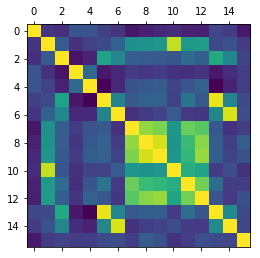

In [108]:
plt.matshow(ceosal.corr())

In [109]:
model1 = smf.ols('salary ~age +college +grad +comten+ceoten+sales+profits+mktval',data=ceosal).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     5.663
Date:                Thu, 02 Aug 2018   Prob (F-statistic):           2.26e-06
Time:                        18:37:30   Log-Likelihood:                -1358.1
No. Observations:                 177   AIC:                             2734.
Df Residuals:                     168   BIC:                             2763.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    699.7096    400.562      1.747      0.082     -91.073    1490.492
age            3.2233      5.663      0.569      0.570      -7.957      14.404
college     -133.3714    250.307     -0.533      0.595    -627.525     360.782
grad         -55.1727     84.717     -0.651      0.516    -222.419     112.073
comten        -5.3219      3.905     -1.363      0.175     -13.032       2.388
ceoten        13.5699      6.165      2.201      0.029       1.399      25.740
sales          0.0177      0.011      1.588      0.114      -0.004       0.040
profits        0.0555      0.276      0.201      0.841      -0.489       0.600
mktval         0.0225      0.016      1.412      0.160      -0.009       0.054
==============================================================================
Omnibus:                      193.206   Durbin-Watson:                   2.145
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7392.898
Skew:                           4.070   Prob(JB):                         0.00
Kurtosis:                      33.597   Cond. No.                     1.07e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [140]:
regr = linear_model.LinearRegression()

In [115]:
xdata = pd.concat([ceosal['sales'],ceosal['profits'],ceosal['grad'],ceosal['college']],axis=1)
ydata = ceosal['salary']
model = regr.fit(xdata,ydata)
from sklearn import metrics
pred = model.predict(xdata)
mse = metrics.mean_squared_error(ydata,pred)
mse

284666.3477111516

In [116]:
ceosal['high_sal'] = (ceosal['salary']>800).astype(int)
ceosal['high_sal']
#model12 = smf.logit('costly~colonial+bdrms+lotsize+sqrft',data=hprice).fit()
#model12.summary()
#model8 = sm.GLM('costly~colonial+bdrms+llotsize+lsqrft',family=sm.families.Binomial(),data=hprice).fit()
model8 = smf.glm('high_sal~profits+age+lsales+lmktval+grad',family=sm.families.Binomial(),data=ceosal).fit()
model8.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               high_sal   No. Observations:                  177
Model:                            GLM   Df Residuals:                      171
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -95.644
Date:                Thu, 02 Aug 2018   Deviance:                       191.29
Time:                        18:37:58   Pearson chi2:                     171.
No. Iterations:                     6                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.8774      2.244     -3.065      0.002     -11.276      -2.479
profits        0.0017      0.001      1.331      0.183      -0.001       0.004
age            0.0151      0.022      0.673      0.501      -0.029       0.059
lsales         0.4346      0.200      2.174      0.030       0.043       0.826
lmktval        0.3486      0.308      1.134      0.257      -0.254       0.951
grad          -0.3494      0.362     -0.964      0.335      -1.060       0.361
==============================================================================
"""

In [117]:
model5 = smf.ols('salary~profits',data=ceosal).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     32.14
Date:                Thu, 02 Aug 2018   Prob (F-statistic):           5.81e-08
Time:                        18:38:08   Log-Likelihood:                -1364.3
No. Observations:                 177   AIC:                             2733.
Df Residuals:                     175   BIC:                             2739.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    746.9238     45.798     16.309      0.000     656.536     837.311
profits        0.5723      0.101      5.670      0.000       0.373       0.772
==============================================================================
Omnibus:                      182.015   Durbin-Watson:                   2.247
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5526.448
Skew:                           3.790   Prob(JB):                         0.00
Kurtosis:                      29.304   Cond. No.                         510.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

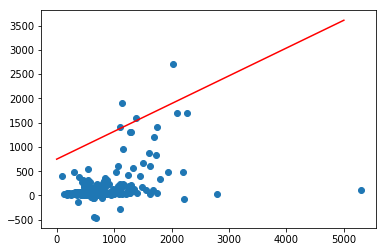

In [128]:
plt.figure()
plt.scatter(ceosal['salary'],ceosal['profits'])
x = np.linspace(0,5000,1000)
y = model5.predict(pd.DataFrame({'profits':x}))
plt.plot(x,y, c = 'red')

In [120]:
##### K-means####################
ceosal1 = ceosal.iloc[:, 2:].values
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_scale= sc_X.fit_transform(ceosal1)

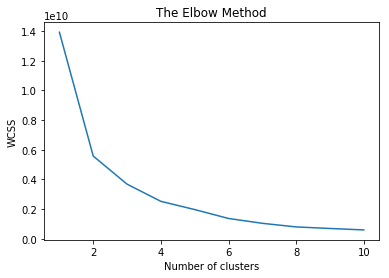

In [121]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(ceosal1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [122]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(ceosal1)
print(y_kmeans)



[2 4 4 4 4 3 4 4 4 4 4 4 4 0 4 4 4 4 4 4 4 4 4 4 0 4 4 4 4 0 0 0 0 3 4 0 4
 4 2 2 4 4 3 1 4 4 2 4 4 2 0 0 4 4 4 2 4 4 4 0 4 0 4 4 4 4 4 4 4 4 4 0 4 4
 4 4 2 4 4 4 4 4 4 4 4 4 4 0 4 4 4 4 0 0 4 4 4 4 4 4 0 4 4 4 4 2 2 4 4 4 4
 4 0 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 0 4 4 4 4 4 2 4 4 4 4 4 4 4 4 4 0 4 4 4
 4 4 4 4 0 0 4 4 4 4 4 4 4 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


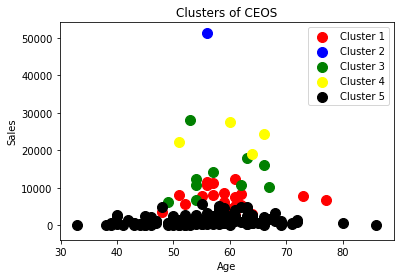

In [138]:
# Visualising the clusters
plt.scatter(ceosal1[y_kmeans == 0, 0], ceosal1[y_kmeans == 0, 5], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(ceosal1[y_kmeans == 1, 0], ceosal1[y_kmeans == 1, 5], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(ceosal1[y_kmeans == 2, 0], ceosal1[y_kmeans == 2, 5], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(ceosal1[y_kmeans == 3, 0], ceosal1[y_kmeans == 3, 5], s = 100, c = 'yellow', label = 'Cluster 4')
plt.scatter(ceosal1[y_kmeans == 4, 0], ceosal1[y_kmeans == 4, 5], s = 100, c = 'black', label = 'Cluster 5')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of CEOS')
plt.xlabel('Age')
plt.ylabel('Sales')
plt.legend()
plt.show()